# Look at multitask-specific model metadata
Multitask performance metrics can be pulled from `compare_models.get_multitask_perf_from_files_new()`

## Import models and setup variables

In [15]:
from atomsci.ddm.pipeline import compare_models as cmp

The `result_dir` and `dataset_key` must be full, **absolute** paths.

In [22]:
import os
os.getcwd()

'/Users/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/examples/tutorials/ad_hoc_tutorials'

In [26]:
result_dir='/Users/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/examples/tutorials/ad_hoc_tutorials'

# pred_type='classification'
# MT_dataset_key='/home/apaulson/repos/AMPL_umbrella/ampl_berkeley/datasets/NEK9_binding_inhibition.csv'

pred_type='regression'
reg_dataset_key='/Users/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/examples/tutorials/dataset/SLC6A2_3_4.csv'

## Multitask model usage

If you try to pull information from models trained on two different datasets you will throw an error. The error should help you narrow it down by providing your choices of dataset_keys.

Occasionally people only have `tar.gz` model files and have lost (or never had) the corresponding folder structure from their filesystem. If this is the case, you can use the optional `tar=True` flag to have the function read tar files instead. This defaults to `False` for speed.

In [27]:
mtm=cmp.get_multitask_perf_from_files_new(result_dir, pred_type, tar=False)

Found data for 12 regression models under /Users/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/examples/tutorials/ad_hoc_tutorials


/Users/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/pipeline/compare_models.py:1963: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  models['feat_parameters_dict']=models.filter(items=['ecfp_specific','auto_featurizer_specific','autoencoder_specific','feat_parameters_dict']).ffill(axis=1).feat_parameters_dict


Here we provide the dataset_key of interest and do not receive an error:

In [28]:
mtm=cmp.get_multitask_perf_from_files_new(result_dir, pred_type, dataset_key=reg_dataset_key)

Found data for 12 regression models under /Users/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/examples/tutorials/ad_hoc_tutorials


/Users/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/pipeline/compare_models.py:1963: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  models['feat_parameters_dict']=models.filter(items=['ecfp_specific','auto_featurizer_specific','autoencoder_specific','feat_parameters_dict']).ffill(axis=1).feat_parameters_dict


## Performance df format
The multitask performance is provided **long-form**, meaning that each individual task is provided in a single row. Each model will have 1 row representing the full model metrics, and then 1 additional row for each task.

In [29]:
mtm.shape

(48, 42)

In [31]:
one_model=mtm[mtm.model_uuid==mtm.model_uuid.iloc[0]]

## Filtering for a single task
You can filter your model metrics by `response_cols`. You can see that the `model_choice_score` is only valid for the full model, while individual metrics exist for each task in the model.

In [33]:
one_model[['model_uuid','response_cols','model_choice_score_type','best_valid_model_choice_score', 'best_valid_r2_score']]

,model_uuid,response_cols,model_choice_score_type,best_valid_model_choice_score,best_valid_r2_score
0,db9dcc26-7db3-47fc-a595-18d874d91824,full_model,r2,0.444162,0.444162
1,db9dcc26-7db3-47fc-a595-18d874d91824,avg_pKi_SLC6A2,r2,NaN,0.453736
2,db9dcc26-7db3-47fc-a595-18d874d91824,avg_pKi_SLC6A3,r2,NaN,0.460893
3,db9dcc26-7db3-47fc-a595-18d874d91824,avg_pKi_SLC6A4,r2,NaN,0.417857


In [34]:
slc6a3_models=mtm[mtm.response_cols=='avg_pKi_SLC6A3']

In [35]:
slc6a3_models.sort_values('best_valid_r2_score', ascending=False)[['model_uuid','model_type', 'response_cols',
                    'splitter','features','best_valid_r2_score','model_parameters_dict','feat_parameters_dict','model_path']].head(5)

,model_uuid,model_type,response_cols,splitter,features,best_valid_r2_score,model_parameters_dict,feat_parameters_dict,model_path
26,f7477edd-4ca4-4011-9705-1ad645dd74ee,NN,avg_pKi_SLC6A3,multitaskscaffold,ecfp,0.547707,"{'batch_size': 50, 'best_epoch': 17, 'bias_ini...","{'ecfp_radius': 2, 'ecfp_size': 1024}",/Users/apaulson/repos/AMPL_umbrella/AMPL/atoms...
42,3494f03f-cbf8-457d-962d-b8a2bbc8d956,NN,avg_pKi_SLC6A3,multitaskscaffold,ecfp,0.547264,"{'batch_size': 50, 'best_epoch': 19, 'bias_ini...","{'ecfp_radius': 2, 'ecfp_size': 1024}",/Users/apaulson/repos/AMPL_umbrella/AMPL/atoms...
38,7a60520e-2792-46b3-89e3-2fb8d611580a,NN,avg_pKi_SLC6A3,multitaskscaffold,ecfp,0.53902,"{'batch_size': 50, 'best_epoch': 16, 'bias_ini...","{'ecfp_radius': 2, 'ecfp_size': 1024}",/Users/apaulson/repos/AMPL_umbrella/AMPL/atoms...
46,1c1e23b6-feb4-4d89-a6b2-d660ca9d74a4,NN,avg_pKi_SLC6A3,multitaskscaffold,ecfp,0.534793,"{'batch_size': 50, 'best_epoch': 17, 'bias_ini...","{'ecfp_radius': 2, 'ecfp_size': 1024}",/Users/apaulson/repos/AMPL_umbrella/AMPL/atoms...
22,cd9f0286-2b38-4220-9597-9a397f34086b,NN,avg_pKi_SLC6A3,multitaskscaffold,rdkit_raw,0.52653,"{'batch_size': 50, 'best_epoch': 311, 'bias_in...",NaN,/Users/apaulson/repos/AMPL_umbrella/AMPL/atoms...


## Compatibility with other functions
The filtered dataframe is largely compatible with other functions such as those from `hyper_perf_plots`

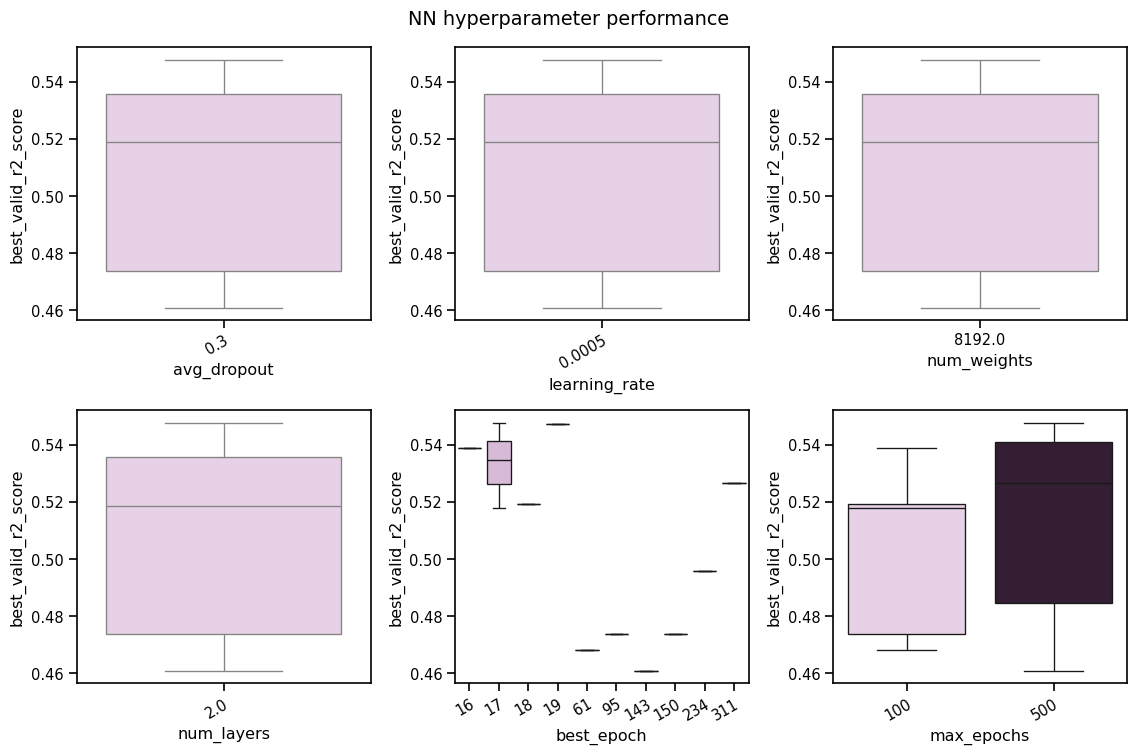

In [37]:
from atomsci.ddm.pipeline import hyper_perf_plots as hpp
import importlib
importlib.reload(hpp)
hpp.plot_hyper_perf(slc6a3_models, scoretype='r2_score', subset='valid', model_type='NN')

## Single-task models
This function can also be used to pull information for single-task models.

In [99]:
ST_result_dir='/Users/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/examples/'
ST_dataset_key='/Users/apaulson/repos/AMPL/atomsci/ddm/examples/tutorials/dataset/SLC6A3_Ki_curated.csv'

stm=cmp.get_multitask_perf_from_files_new(ST_result_dir, pred_type, dataset_key=ST_dataset_key)

Found data for 37 regression models under /Users/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/examples/


/Users/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/pipeline/compare_models.py:1963: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  models['feat_parameters_dict']=models.filter(items=['ecfp_specific','auto_featurizer_specific','autoencoder_specific','feat_parameters_dict']).ffill(axis=1).feat_parameters_dict


For single-task models, only one row is returned per model.

In [100]:
onemod=stm[stm.model_uuid=='b482bb88-01e8-438b-a907-db36559325af']
onemod

,model_uuid,time_built,ampl_version,dataset_key,model_path,model_type,prediction_type,splitter,split_strategy,split_valid_frac,...,best_valid_std_response_vals,best_test_mae_score,best_test_mean_response_vals,best_test_num_compounds,best_test_r2_score,best_test_rms_score,best_test_std_response_vals,splitting_parameters,model_parameters_dict,feat_parameters_dict
35,b482bb88-01e8-438b-a907-db36559325af,1.721760e+09,1.6.1,/Users/apaulson/repos/AMPL/atomsci/ddm/example...,/Users/apaulson/repos/AMPL_umbrella/AMPL/atoms...,RF,regression,scaffold,train_valid_test,0.1,...,[1.237761344108214],0.209153,[6.424967844630288],1819,0.947116,0.284642,[1.237761344108214],"{'base_splitter': 'scaffold', 'butina_cutoff':...","{'rf_estimators': 129, 'rf_max_depth': 32, 'rf...","{'ecfp_radius': 2, 'ecfp_size': 1024}"


In [101]:
stm.sort_values('best_valid_r2_score', ascending=False)[['model_uuid', 'model_type', 'response_cols',
                    'splitter','features','weight_transform_type','model_parameters_dict','feat_parameters_dict','best_valid_r2_score','model_path']].head(5)

,model_uuid,model_type,response_cols,splitter,features,weight_transform_type,model_parameters_dict,feat_parameters_dict,best_valid_r2_score,model_path
35,b482bb88-01e8-438b-a907-db36559325af,RF,avg_pKi,scaffold,ecfp,None,"{'rf_estimators': 129, 'rf_max_depth': 32, 'rf...","{'ecfp_radius': 2, 'ecfp_size': 1024}",0.947116,/Users/apaulson/repos/AMPL_umbrella/AMPL/atoms...
36,d5bd931b-8401-48db-a53b-f5a5a4e1c361,RF,avg_pKi,scaffold,ecfp,None,"{'rf_estimators': 129, 'rf_max_depth': 32, 'rf...","{'ecfp_radius': 2, 'ecfp_size': 1024}",0.945191,/Users/apaulson/repos/AMPL_umbrella/AMPL/atoms...
19,f965dcff-7986-48c4-af08-3783f0c619b2,RF,avg_pKi,scaffold,rdkit_raw,None,"{'rf_estimators': 500, 'rf_max_depth': None, '...",NaN,0.530369,/Users/apaulson/repos/AMPL_umbrella/AMPL/atoms...
18,d69e06da-9bc4-433b-91d7-b81f190fafa5,RF,avg_pKi,scaffold,rdkit_raw,None,"{'rf_estimators': 500, 'rf_max_depth': None, '...",NaN,0.529709,/Users/apaulson/repos/AMPL_umbrella/AMPL/atoms...
20,7b2e9b91-a955-438d-8dea-5c26d0a3c4ed,RF,avg_pKi,scaffold,rdkit_raw,None,"{'rf_estimators': 500, 'rf_max_depth': None, '...",NaN,0.501000,/Users/apaulson/repos/AMPL_umbrella/AMPL/atoms...


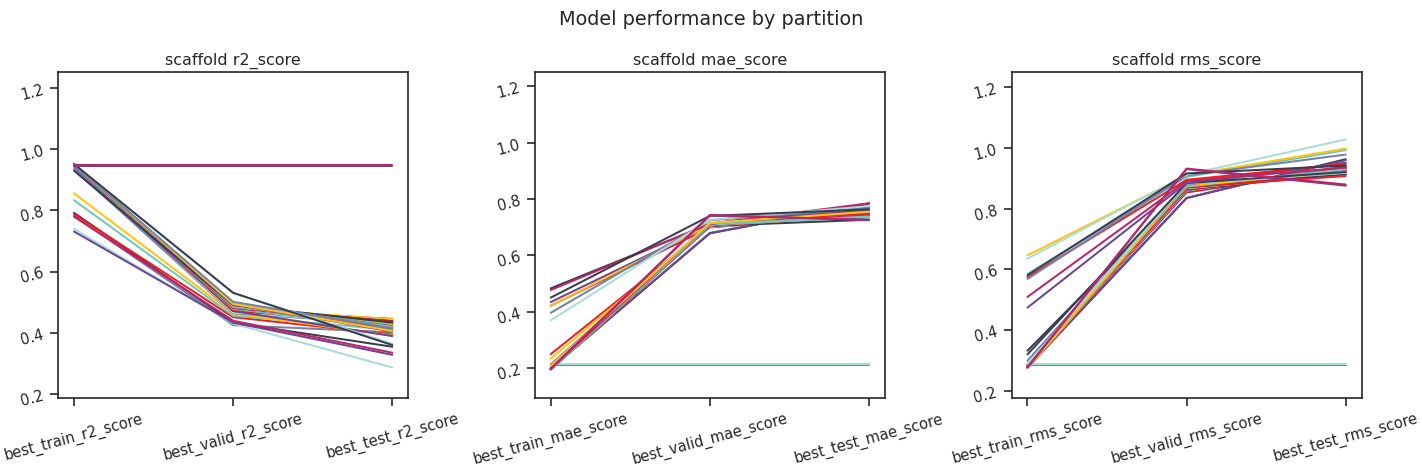

In [102]:
hpp.plot_train_valid_test_scores(stm, prediction_type=pred_type)

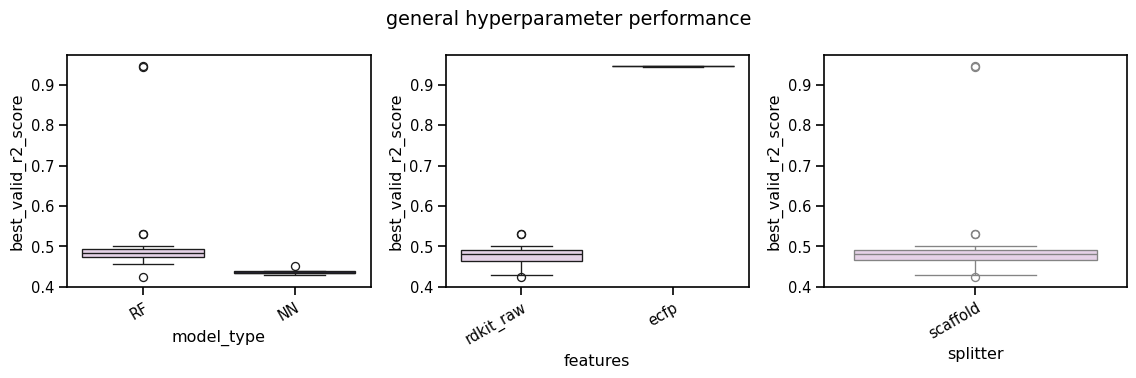

In [103]:
importlib.reload(hpp)
hpp.plot_hyper_perf(stm, scoretype='r2_score', model_type='general')

2024-07-23 20:45:05,056 /Users/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/examples/tutorials/dataset/SLC6A3_models/SLC6A3_Ki_curated_model_b482bb88-01e8-438b-a907-db36559325af.tar.gz, 1.6.1
2024-07-23 20:45:05,057 Version compatible check: /Users/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/examples/tutorials/dataset/SLC6A3_models/SLC6A3_Ki_curated_model_b482bb88-01e8-438b-a907-db36559325af.tar.gz version = "1.6", AMPL version = "1.6"
2024-07-23 20:45:05,125 Featurizing data...
2024-07-23 20:45:09,047 Done



Best valid r2 score:  0.9471159128153642

Model Parameters:  {'rf_estimators': 129, 'rf_max_depth': 32, 'rf_max_features': 95} 



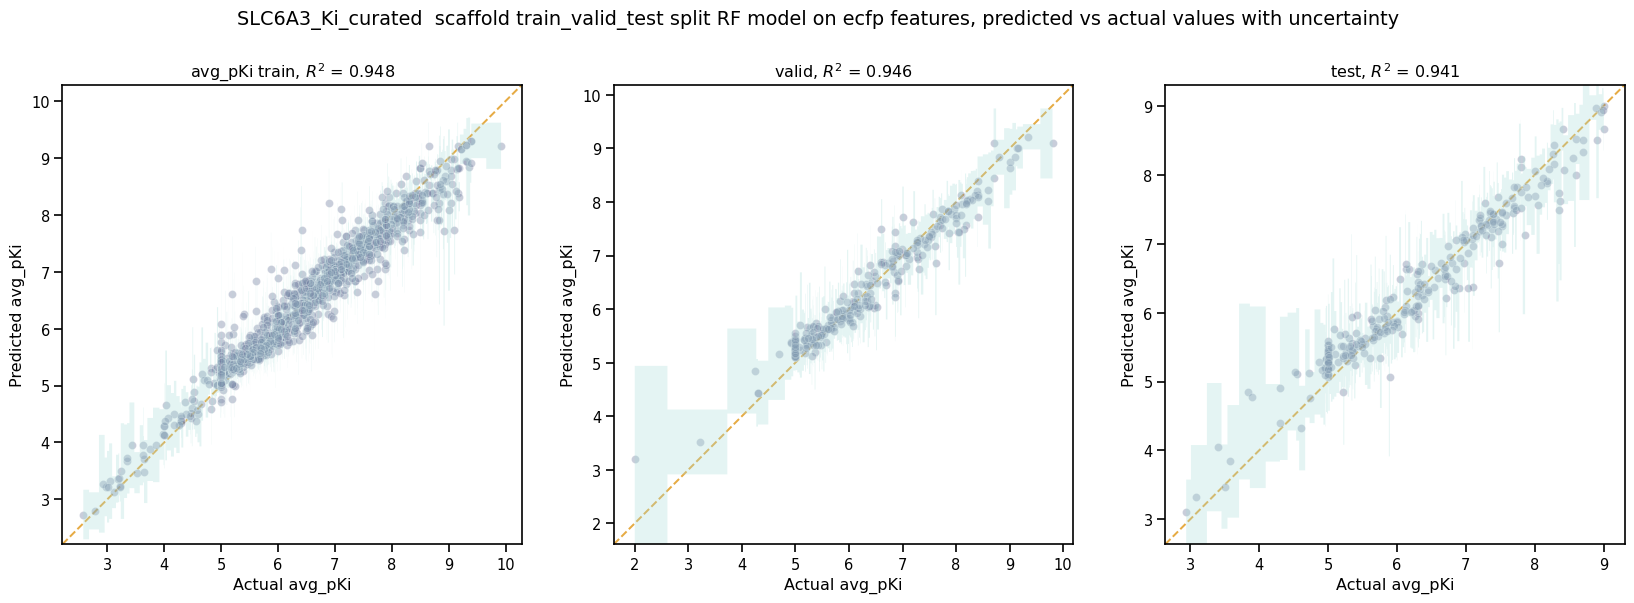

In [104]:
# plot best RF model
from atomsci.ddm.pipeline import perf_plots as pp

stm=stm.sort_values('best_valid_r2_score', ascending=False)
model_path=stm.iloc[0].model_path
pp.plot_pred_vs_actual_from_file(model_path, external_training_data='/Users/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/examples/tutorials/dataset/SLC6A3_Ki_curated.csv')
print('\nBest valid r2 score: ',stm[stm.model_type==model_type].iloc[0].best_valid_r2_score)
print('\nModel Parameters: ',stm[stm.model_type==model_type].iloc[0].model_parameters_dict,'\n')

In [105]:
stm.splitter.unique()

array(['scaffold'], dtype=object)